###### Refer to E-Book 1

## Section 6.2

### 6.2.1. Decision tree induction

Decision tree induction is a popular machine learning technique used for both classification and regression tasks. It's a tree-like model where each node represents a decision based on a feature, and each branch represents the outcome of that decision, leading to the next node. The leaves of the tree represent the final output or the decision.
Decision Tree Induction:

#### Decision tree induction involves the following steps:

    - Selection of the Root Node: The algorithm selects the feature that best splits the data into subsets, considering criteria such as Gini impurity or information gain.

    - Splitting the Nodes: The data is split into subsets based on the chosen feature.

    - Recursive Process: Steps 1 and 2 are recursively applied to each subset until a stopping criterion is met, such as a specific depth or a minimum number of samples in a node.

    - Assigning Labels: The final step involves assigning labels or values to the leaves of the tree, based on the majority class or average value in the leaf node.

Decision trees are interpretable, easy to understand, and can handle both numerical and categorical data.
#### Practical Example in Python:

Let's consider a real-world example using the famous Iris dataset, where the goal is to classify iris flowers into three species (setosa, versicolor, or virginica) based on features like sepal length, sepal width, petal length, and petal width.

In [1]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Display the accuracy of the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Display the decision tree rules
tree_rules = export_text(clf, feature_names=iris.feature_names)
print("Decision Tree Rules:\n", tree_rules)


Accuracy: 1.00
Decision Tree Rules:
 |--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |   

    In this example, we use the scikit-learn library to create a DecisionTreeClassifier, train it on the Iris dataset, make predictions, and evaluate the accuracy. The export_text function is used to display the decision tree rules in a human-readable format.

### 6.2.2. Attribute selection measures

In the context of data mining and machine learning, attribute selection measures, also known as feature selection, refer to the process of choosing a subset of relevant features from a larger set of features. The goal is to improve the model's performance, reduce overfitting, and enhance interpretability. There are various attribute selection measures, each with its own criteria for evaluating the importance of features. Some common 
#### measures include:

1. Information Gain: Measures how well a feature separates the data into classes.

2. Gain Ratio: Similar to Information Gain but adjusts for the number of branches a node has.

3. Gini Index: Measures the impurity of a set of examples, with lower values indicating better splits.

4. Chi-square: Tests the independence between the feature and the class, helping to select features that are statistically significant.

#### Practical Example in Python:

Let's use the famous Iris dataset again and apply Information Gain as the attribute selection measure to choose the most relevant features for classification.

In [2]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Information Gain for feature selection
selector = SelectKBest(mutual_info_classif, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the selected training data
clf.fit(X_train_selected, y_train)

# Make predictions on the selected test data
predictions = clf.predict(X_test_selected)

# Display the accuracy of the model
accuracy = clf.score(X_test_selected, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Display the decision tree rules for the selected features
selected_feature_names = [iris.feature_names[i] for i in selector.get_support(indices=True)]
tree_rules = export_text(clf, feature_names=selected_feature_names)
print("Decision Tree Rules for Selected Features:\n", tree_rules)


Accuracy: 1.00
Decision Tree Rules for Selected Features:
 |--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- class: 2
|   |   |   |--- petal length (cm) >  4.85
|   |   |   |   |--- class: 2



    In this example, we use scikit-learn's SelectKBest with mutual information as the scoring function to select the top k features with the highest information gain. We then train a decision tree classifier on the selected features and evaluate its accuracy. This example demonstrates the practical application of attribute selection measures to enhance the performance of a machine learning model.

### 6.2.3. Tree pruning

Tree pruning is a technique used in decision tree algorithms to prevent overfitting. Overfitting occurs when a tree is too complex and captures noise in the training data, leading to poor generalization on new, unseen data. Pruning involves removing parts of the tree that do not provide significant predictive power. There are two main types of pruning:

1. Pre-pruning (Early Stopping): This involves stopping the tree-building process early, before it becomes too complex. Common pre-pruning strategies include limiting the maximum depth of the tree, setting a minimum number of samples required to split a node, or requiring a minimum number of samples in a leaf.

2. Post-pruning (Pruning After Tree Construction): This involves building the full tree and then removing nodes that do not contribute significantly to predictive accuracy. Post-pruning methods include cost-complexity pruning, where a hyperparameter (alpha) controls the trade-off between tree complexity and fit to the training data.

#### Practical Example in Python:

Let's use the Iris dataset again and apply post-pruning using cost-complexity pruning to a decision tree classifier.

In [3]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Define the hyperparameter grid for cost-complexity pruning
param_grid = {'ccp_alpha': [0.001, 0.002, 0.003, 0.004, 0.005]}

# Use GridSearchCV to find the best hyperparameter
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best decision tree classifier
best_clf = grid_search.best_estimator_

# Make predictions on the test data
predictions = best_clf.predict(X_test)

# Display the accuracy of the pruned tree
accuracy = best_clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Display the decision tree rules for the pruned tree
tree_rules = export_text(best_clf, feature_names=iris.feature_names)
print("Decision Tree Rules for Pruned Tree:\n", tree_rules)


Accuracy: 1.00
Decision Tree Rules for Pruned Tree:
 |--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   | 

    In this example, we use GridSearchCV to perform a search over a hyperparameter grid for the best alpha value (ccp_alpha) for cost-complexity pruning. The selected hyperparameter helps control the trade-off between tree complexity and fit to the training data, resulting in a pruned decision tree.

## Section 6.3

### 6.3.1. Bayes’ theorem

Bayes' Theorem is a fundamental concept in probability theory, named after Reverend Thomas Bayes. It provides a way to update our beliefs about a hypothesis based on new evidence. The theorem is expressed mathematically as:

P(A∣B)=P(B∣A)⋅P(A)P(B)

where:

    - P(A∣B) is the probability of event A occurring given that event B has occurred.
    - P(B∣A) is the probability of event B occurring given that event A has occurred.
    - P(A) and P(B) are the probabilities of events A and B occurring, respectively.

Bayes' Theorem is widely used in statistics and machine learning for tasks such as classification, spam filtering, and medical diagnosis.
#### Practical Example in Python:

Let's consider a practical example of spam email classification using the Naive Bayes algorithm. We'll use the famous "Spambase" dataset, which contains features based on the frequency of certain words and characters in emails, along with labels indicating whether an email is spam or not.

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Load the Spambase dataset (you may need to adjust the path)
data = pd.read_csv('path_to_spambase_dataset/spambase.csv')

# Separate features (X) and labels (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier (MultinomialNB for discrete features)
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_spambase_dataset/spambase.csv'

    In this example, we use the Naive Bayes algorithm (specifically, Multinomial Naive Bayes) to classify emails as spam or non-spam based on the frequency of certain words and characters. The CountVectorizer is used to convert the text data into numerical features suitable for the Naive Bayes algorithm.

### 6.3.2. Naïve Bayesian classification

Naïve Bayesian Classification is a probabilistic classification technique based on Bayes' Theorem with the "naïve" assumption of feature independence. Despite its simplicity and the independence assumption, Naïve Bayes classifiers often perform well in practice, especially for text classification and spam filtering.

The "naïve" assumption implies that the presence (or absence) of a particular feature in a class is independent of the presence (or absence) of other features. This assumption simplifies the computation and makes it computationally efficient, even for datasets with a large number of features.

The basic formula for Naïve Bayesian Classification is:

P(y∣X)=P(X∣y)⋅P(y)P(X)

where:

    - P(y∣X) is the probability of class y given the features X.
    - P(X∣y) is the probability of features X given class y.
    - P(y) is the prior probability of class y.
    - P(X) is the prior probability of features X.

#### Practical Example in Python:

Let's consider a practical example of text classification using Naïve Bayes. We'll use the famous 20 Newsgroups dataset, which consists of newsgroup documents categorized into 20 different topics.

In [5]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create a Naïve Bayes classifier (MultinomialNB for discrete features)
clf = MultinomialNB()

# Train the classifier on the TF-IDF transformed training data
clf.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test data
predictions = clf.predict(X_test_tfidf)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions, target_names=newsgroups.target_names))


Accuracy: 0.66
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.86      0.12      0.21       151
           comp.graphics       0.70      0.61      0.66       202
 comp.os.ms-windows.misc       0.67      0.61      0.64       195
comp.sys.ibm.pc.hardware       0.52      0.78      0.62       183
   comp.sys.mac.hardware       0.89      0.64      0.74       205
          comp.windows.x       0.89      0.81      0.85       215
            misc.forsale       0.86      0.60      0.71       193
               rec.autos       0.85      0.73      0.79       196
         rec.motorcycles       0.51      0.74      0.61       168
      rec.sport.baseball       0.96      0.77      0.86       211
        rec.sport.hockey       0.88      0.88      0.88       198
               sci.crypt       0.63      0.83      0.71       201
         sci.electronics       0.85      0.55      0.67       202
                 sci.med       0.88 

    In this example, we use the Multinomial Naive Bayes classifier on the TF-IDF (Term Frequency-Inverse Document Frequency) transformed text data.

## Section 6.4

### 6.4.1. k-nearest-neighbor classifiers

The k-Nearest-Neighbor (k-NN) algorithm is a simple and intuitive classification technique based on the idea that similar instances are likely to belong to the same class. In other words, it classifies a data point based on the majority class of its k nearest neighbors in the feature space. The distance metric (e.g., Euclidean distance) is commonly used to measure the similarity between instances.

#### The key steps in the k-NN algorithm are:

1. Choose a value for k: Decide on the number of neighbors (k) to consider when making a classification.

2. Compute distances: Calculate the distance between the target instance and all instances in the training set.

3. Identify k-nearest neighbors: Select the k instances with the smallest distances.

4. Majority voting: Assign the class label based on the majority class among the k neighbors.

k-NN is a lazy learner, meaning it doesn't build a model during the training phase. Instead, it stores the entire training dataset and performs computations at the time of prediction.
#### Practical Example in Python:

Let's use the famous Iris dataset and apply the k-NN algorithm for classification.

In [6]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-NN classifier with k=3 (you can adjust the value of k)
clf = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions, target_names=iris.target_names))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



    In this example, we use scikit-learn to create a k-NN classifier with k=3. The classifier is trained on the Iris dataset, and predictions are made on the test data. The accuracy and classification report are then displayed. 

### 6.4.2. Case-based reasoning

Case-Based Reasoning is a problem-solving approach that relies on retrieving and adapting solutions from past experiences or cases. It operates on the principle that similar problems have similar solutions. CBR consists of four main steps:

1. Retrieve: Identify similar cases from the case base (database of past experiences) based on the current problem.

2. Reuse: Apply the solution from the retrieved case to the current problem. If an exact match is not found, adapt the solution to fit the current context.

3. Revise: Evaluate the solution's success and, if necessary, revise the solution based on feedback or new information.

4. Retain: Store the new case in the case base for future use.

CBR is particularly useful in situations where traditional rule-based or model-based approaches may be challenging due to uncertainty, complexity, or changing environments.
#### Practical Example in Python:

Let's consider a practical example of case-based reasoning for a recommendation system. We'll use the MovieLens dataset and recommend movies based on user preferences.

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the MovieLens dataset (you may need to adjust the path)
movies = pd.read_csv('path_to_movielens_dataset/movies.csv')
ratings = pd.read_csv('path_to_movielens_dataset/ratings.csv')

# Merge movies and ratings data
movie_ratings = pd.merge(ratings, movies, on='movieId')

# Create a user-item matrix for collaborative filtering
user_item_matrix = movie_ratings.pivot_table(index='userId', columns='title', values='rating', fill_value=0)

# Use TF-IDF to convert movie titles into numerical features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['title'])

# Calculate cosine similarity between movie titles
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get movie recommendations using CBR
def get_movie_recommendations(movie_title):
    movie_index = movies.index[movies['title'] == movie_title].tolist()[0]
    cosine_scores = list(enumerate(cosine_sim[movie_index]))
    cosine_scores = sorted(cosine_scores, key=lambda x: x[1], reverse=True)
    top_similar_movies = cosine_scores[1:6]  # Exclude the input movie itself

    recommended_movies = []
    for index, score in top_similar_movies:
        recommended_movies.append(movies['title'].iloc[index])

    return recommended_movies

# Example usage
input_movie = "The Dark Knight"
recommendations = get_movie_recommendations(input_movie)

# Display the recommendations
print(f"Movies similar to '{input_movie}':")
for movie in recommendations:
    print("-", movie)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_movielens_dataset/movies.csv'

    In this example, we use case-based reasoning to recommend movies based on the similarity of their titles. The TF-IDF vectorizer is used to convert movie titles into numerical features, and cosine similarity is calculated to measure the similarity between movies. The get_movie_recommendations function retrieves similar movies based on the input movie title.

## Section 6.5

### 6.5.1. Linear regression

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. The relationship is assumed to be linear, meaning that changes in the dependent variable are proportional to changes in the independent variable(s). The basic equation for a simple linear regression is:

y=mx+b

where:

    - y is the dependent variable.
    - x is the independent variable.
    - m is the slope (the rate at which y changes with respect to x).
    - b is the y-intercept (the value of y when x is 0).

In multiple linear regression, the equation extends to include multiple independent variables:

y=b0+b1x1+b2x2+…+bnxn

where:

    - b0​ is the y-intercept.
    - b1,b2,…,bn​ are the coefficients for the independent variables x1,x2,…,xn.

Linear regression is commonly used for predicting numeric values, such as predicting house prices based on square footage or predicting sales based on advertising spend.
#### Practical Example in Python:

Let's consider a practical example of linear regression for predicting house prices using the Boston Housing dataset.

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['target'])

# Select a single feature (e.g., 'RM' - average number of rooms per dwelling)
X_feature = X[['RM']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model coefficients and performance metrics
print("Coefficients:", model.coef_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('House Price')
plt.title('Linear Regression: House Price Prediction')
plt.show()


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


    In this example, we use the average number of rooms ('RM') as the independent variable to predict house prices. The linear regression model is trained on the Boston Housing dataset, and predictions are made on the test data. The performance of the model is evaluated using mean squared error and R-squared. The regression line is plotted to visualize the relationship between the average number of rooms and house prices.

### 6.5.2. Perceptron: turning linear regression to classification

The perceptron is a basic building block of artificial neural networks and serves as a simple binary classifier. It's an algorithm for supervised learning that takes a set of input features and produces an output (binary classification) based on a linear combination of those inputs. The perceptron is trained to learn the weights associated with each input feature, and it applies a step function to make a binary decision.

In the context of turning linear regression into classification using a perceptron:

1. Linear Regression:
    In linear regression, the model predicts a continuous output. The linear regression equation is used to calculate a numerical value based on input features.

2. Thresholding with Perceptron:
    To convert this into a classification problem, a thresholding step is introduced. If the calculated numerical value is above a certain threshold, the perceptron outputs one class (e.g., 1), and if it's below the threshold, it outputs the other class (e.g., 0).

3. Activation Function:
    The step function used for thresholding is the activation function of the perceptron. Commonly used activation functions include the Heaviside step function or the sigmoid function.

#### Practical Example in Python:

Let's consider a practical example of using a perceptron for binary classification using the Iris dataset.

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



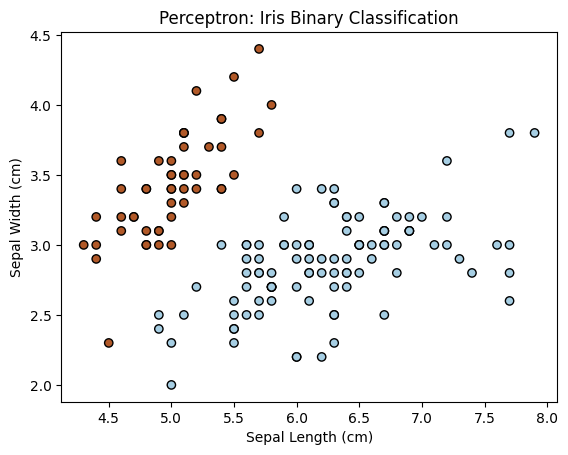

In [9]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Consider only the first two features for simplicity and binary classification
X = X[:, :2]

# Map iris classes to binary classes (setosa vs. non-setosa)
y_binary = (y == 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create a perceptron classifier
perceptron = Perceptron()

# Train the perceptron on the training data
perceptron.fit(X_train, y_train)

# Make predictions on the test data
predictions = perceptron.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y_binary, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Perceptron: Iris Binary Classification')
plt.show()


    In this example, we use the first two features of the Iris dataset for simplicity and perform binary classification to distinguish setosa from non-setosa flowers. The perceptron is trained on the training data and used to make predictions on the test data. The accuracy and classification report are then displayed, and the decision boundary is visualized.

### 6.5.3. Logistic regression

Despite its name, logistic regression is a classification algorithm, not a regression one. It's particularly useful for binary classification problems, where the goal is to predict whether an instance belongs to one of two classes. Logistic regression models the probability that an instance belongs to a particular class using the logistic function (also known as the sigmoid function). The logistic function outputs values between 0 and 1, which can be interpreted as probabilities.

The logistic regression model can be mathematically expressed as:

P(y=1)=11+e−(b0+b1x1+b2x2+…+bnxn)

where:

    - P(y=1) is the probability of the instance belonging to class 1.
    - e is the base of the natural logarithm.
    - b0,b1,…,bn are the coefficients.
    - x1,x2,…,xn​ are the input features.

Logistic regression is widely used in various domains, such as healthcare for disease prediction, marketing for customer churn prediction, and finance for credit scoring.
#### Practical Example in Python:

Let's consider a practical example of using logistic regression for binary classification using the famous Titanic dataset.

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset (you may need to adjust the path)
titanic = pd.read_csv('path_to_titanic_dataset/titanic.csv')

# Drop rows with missing values and select relevant features
titanic = titanic.dropna(subset=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived'])
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic['Survived']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
predictions = logreg.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))

# Plot the confusion matrix
cm = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_titanic_dataset/titanic.csv'

    In this example, logistic regression is applied to predict whether passengers on the Titanic survived or not. The model is trained on features such as passenger class, gender, age, number of siblings/spouses aboard, number of parents/children aboard, fare, and embarkation port. The accuracy, classification report, and confusion matrix are displayed.

## Section 6.6

### 6.6.1. Metrics for evaluating classifier performance

Evaluating the performance of a classifier is crucial to understanding how well it generalizes to new, unseen data. Various metrics provide insights into different aspects of a classifier's performance. Here are some common metrics:

1. Accuracy:
    Accuracy is the ratio of correctly predicted instances to the total instances. It provides an overall measure of classification correctness.
    Accuracy=True Positives+True NegativesTotal InstancesAccuracy=Total InstancesTrue Positives+True Negatives​

2. Precision:
    Precision is the ratio of correctly predicted positive observations to the total predicted positives. It measures the accuracy of the positive predictions.
    Precision=True PositivesTrue Positives+False PositivesPrecision=True Positives+False PositivesTrue Positives​

3. Recall (Sensitivity or True Positive Rate):
    Recall is the ratio of correctly predicted positive observations to the total actual positives. It measures the ability of the classifier to capture all positive instances.
    Recall=True PositivesTrue Positives+False NegativesRecall=True Positives+False NegativesTrue Positives​

4. F1 Score:
    The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
    F1 Score=2×Precision×RecallPrecision+RecallF1 Score=Precision+Recall2×Precision×Recall​

5. Confusion Matrix:
    A confusion matrix is a table that summarizes the classifier's performance, showing the counts of true positive, true negative, false positive, and false negative predictions.

6. Receiver Operating Characteristic (ROC) Curve:
    The ROC curve plots the true positive rate against the false positive rate at various threshold settings. It helps visualize the trade-off between sensitivity and specificity.

#### Practical Example in Python:

Let's consider a practical example using the Titanic dataset and evaluate the performance of a logistic regression classifier.

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load the Titanic dataset (you may need to adjust the path)
titanic = pd.read_csv('path_to_titanic_dataset/titanic.csv')

# Drop rows with missing values and select relevant features
titanic = titanic.dropna(subset=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived'])
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic['Survived']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
predictions = logreg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Display the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_titanic_dataset/titanic.csv'

    In this example, logistic regression is used to predict survival on the Titanic. The classifier's performance is evaluated using accuracy, precision, recall, F1 score, and a confusion matrix. Additionally, an ROC curve is plotted to visualize the trade-off between sensitivity and specificity.

### 6.6.2. Holdout method and random subsampling

The Holdout Method and Random Subsampling are techniques used in machine learning for evaluating the performance of a model. They involve splitting the dataset into training and testing sets to assess how well the model generalizes to new, unseen data.

#### Holdout Method:
    In the Holdout Method, the dataset is divided into two parts: a training set and a testing set. The training set is used to train the model, while the testing set is reserved for evaluating its performance. Common split ratios include 70-30, 80-20, or 90-10, depending on the size of the dataset.

#### Random Subsampling (or k-Fold Cross-Validation):
    Random Subsampling involves dividing the dataset into k subsets (folds). The model is trained k times, each time using k-1 folds for training and the remaining fold for testing. This process is repeated k times, with each fold serving as the testing set exactly once. The performance metrics are then averaged across all iterations.

#### Practical Example in Python:

Let's consider a practical example using the Iris dataset and the Holdout Method for evaluating a k-NN classifier.

In [12]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets using the Holdout Method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-NN classifier
clf = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



    In this example, the Iris dataset is split into training and testing sets using the Holdout Method. A k-NN classifier is then trained on the training set and evaluated on the testing set. The accuracy and classification report are displayed to assess the model's performance.

### 6.6.3. Cross-validation

Cross-validation is a resampling technique used to assess the performance and generalization of a machine learning model. It helps to overcome the limitations of a single train-test split by providing a more robust estimate of the model's performance. The most common form of cross-validation is k-Fold Cross-Validation, where the dataset is divided into k subsets (folds). The model is trained k times, each time using k-1 folds for training and the remaining fold for testing. This process is repeated k times, with each fold serving as the testing set exactly once. The performance metrics are then averaged across all iterations.

The steps of k-Fold Cross-Validation are as follows:

1. Split Data:
    Divide the dataset into k equally sized folds.

2. Train-Test Iterations:
    For each iteration, use k-1 folds for training and the remaining fold for testing.

3. Performance Metrics:
    Evaluate the model's performance on each iteration and record the performance metrics.

4. Average Metrics:
    Calculate the average of the recorded performance metrics across all iterations.

#### Benefits of Cross-Validation:

    - Provides a more reliable estimate of a model's performance.

    - Reduces the impact of variability in a single train-test split.

    - Utilizes the entire dataset for training and testing.

#### Practical Example in Python:

Let's consider a practical example using the Iris dataset and k-Fold Cross-Validation with a support vector machine (SVM) classifier.

In [13]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a support vector machine (SVM) classifier
svm_classifier = SVC(kernel='linear')

# Perform k-Fold Cross-Validation (k=5)
cv_scores = cross_val_score(svm_classifier, X, y, cv=5)

# Display the cross-validated accuracy scores
print("Cross-Validated Accuracy Scores:", cv_scores)
print(f"Average Accuracy: {cv_scores.mean():.2f}")


Cross-Validated Accuracy Scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Average Accuracy: 0.98


    In this example, the Iris dataset is used to perform k-Fold Cross-Validation with a linear SVM classifier. The cross_val_score function from scikit-learn is employed to obtain accuracy scores for each fold. The average accuracy across all folds is then calculated.

### 6.6.4. Bootstrap

Bootstrap is a resampling technique used to estimate the variability and uncertainty associated with a sample statistic, such as the mean or standard deviation. It involves repeatedly sampling, with replacement, from the observed data to create multiple bootstrap samples. Each bootstrap sample is then used to compute the sample statistic of interest. By analyzing the distribution of these computed statistics across multiple bootstrap samples, one can obtain confidence intervals and make more robust statistical inferences.

#### The steps of the Bootstrap method are as follows:

1. Original Sample:
        Start with the original dataset of size NN.

2. Bootstrap Samples:
        Generate BB bootstrap samples by randomly selecting NN data points from the original dataset with replacement.

3. Statistic Computation:
        For each bootstrap sample, compute the sample statistic of interest (e.g., mean, standard deviation).

4. Analysis:
        Analyze the distribution of computed statistics to estimate variability, confidence intervals, or perform hypothesis testing.

#### Benefits of Bootstrap:

    - Provides an empirical estimate of the sampling distribution of a statistic.

    - Useful when assumptions of parametric statistical methods are violated.

    - Robust in the presence of outliers.

#### Practical Example in Python:

Let's consider a practical example using the Iris dataset to estimate the confidence interval of the mean sepal length using the Bootstrap method.

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.utils import resample

# Load the Iris dataset
iris = datasets.load_iris()
sepal_length = iris.data[:, 0]

# Set the number of bootstrap samples
num_bootstrap_samples = 1000

# Initialize an array to store bootstrap sample means
bootstrap_means = np.zeros(num_bootstrap_samples)

# Generate bootstrap samples and compute means
for i in range(num_bootstrap_samples):
    bootstrap_sample = resample(sepal_length, replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Display the results
print("Bootstrap Sample Mean: {:.2f}".format(np.mean(bootstrap_means)))
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(confidence_interval[0], confidence_interval[1]))


Bootstrap Sample Mean: 5.85
95% Confidence Interval: [5.72, 5.98]


    In this example, the Bootstrap method is used to estimate the 95% confidence interval of the mean sepal length in the Iris dataset. The resample function from scikit-learn is utilized to generate bootstrap samples. The mean of each bootstrap sample is computed, and the distribution of bootstrap sample means is used to estimate the confidence interval.

### 6.6.5. Model selection using statistical tests of significance

Model selection is a critical step in the data mining process, involving the identification and evaluation of different models to choose the one that best fits the data. Statistical tests of significance can be employed for model selection by comparing the performance of different models and determining if the observed differences are statistically significant.

#### The process typically involves the following steps:

1. Select Candidate Models:
    Choose a set of candidate models that are relevant to the problem at hand.

2. Train Models:
    Train each model on the training dataset.

3. Evaluate Models:
    Evaluate the performance of each model on a validation dataset or through cross-validation.

4. Statistical Testing:
    Apply statistical tests to compare the performance metrics of the models.

5. Select Best Model:
    Choose the model with the best performance, considering both practical significance and statistical significance.

Commonly used statistical tests for model selection include t-tests, ANOVA, or their non-parametric counterparts. These tests help determine if observed differences in performance metrics are likely due to genuine differences in model effectiveness rather than random chance.
#### Practical Example in Python:

Let's consider a practical example using the Iris dataset to compare the performance of two classification models (e.g., Decision Tree and Random Forest) using a t-test for accuracy.

In [15]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_rel

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create classifiers (Decision Tree and Random Forest)
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Perform cross-validation for each model
dt_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

# Perform a paired t-test for accuracy
t_stat, p_value = ttest_rel(dt_scores, rf_scores)

# Display the results
print("Decision Tree Mean Accuracy: {:.2f}".format(dt_scores.mean()))
print("Random Forest Mean Accuracy: {:.2f}".format(rf_scores.mean()))
print("Paired t-test p-value: {:.4f}".format(p_value))

# Check for statistical significance (e.g., p-value < 0.05)
if p_value < 0.05:
    print("The difference in accuracy is statistically significant. Choose the model accordingly.")
else:
    print("There is no statistically significant difference in accuracy between the models.")


Decision Tree Mean Accuracy: 0.95
Random Forest Mean Accuracy: 0.97
Paired t-test p-value: 0.1778
There is no statistically significant difference in accuracy between the models.


    In this example, cross-validation is performed for both Decision Tree and Random Forest classifiers on the Iris dataset. A paired t-test is then conducted to determine if there is a statistically significant difference in accuracy between the two models.

### 6.6.6. Comparing classifiers based on cost–benefit and ROC curves

Comparing classifiers involves assessing their performance using various metrics and visualization techniques. Two common approaches are based on cost–benefit analysis and Receiver Operating Characteristic (ROC) curves.

1. Cost–Benefit Analysis:
    Cost–benefit analysis involves considering the practical consequences of classification decisions. It assigns costs and benefits to different outcomes (true positive, false positive, true negative, false negative) and calculates a total cost or benefit. This approach is especially useful when the consequences of false positives and false negatives are different.

2. ROC Curves:
    ROC curves graphically depict the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for different classification thresholds. The area under the ROC curve (AUC-ROC) summarizes the overall performance of the classifier across various threshold settings.

#### Practical Example in Python:

Let's consider a practical example using the Breast Cancer Wisconsin dataset to compare two classifiers (e.g., Logistic Regression and Random Forest) based on cost–benefit analysis and ROC curves.

d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cost–Benefit Matrix (Logistic Regression):
 [[ 0 15]
 [ 1  0]]
Total Cost (Logistic Regression): 16

Cost–Benefit Matrix (Random Forest):
 [[ 0 15]
 [ 1  0]]
Total Cost (Random Forest): 16


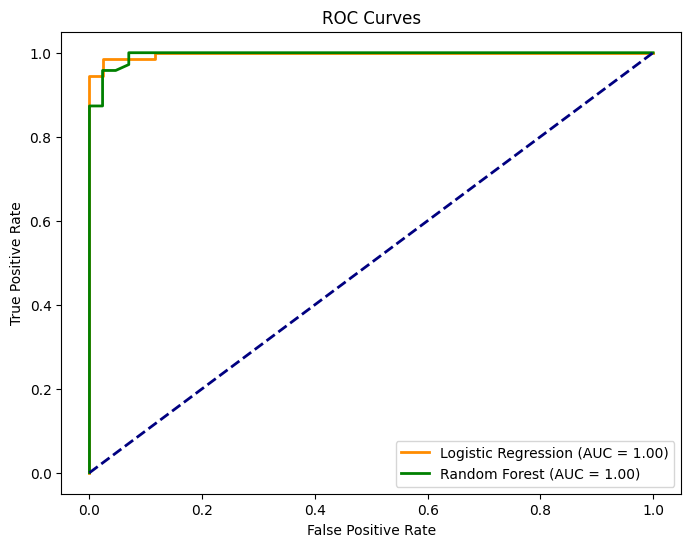

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Load the Breast Cancer Wisconsin dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create classifiers (Logistic Regression and Random Forest)
logreg_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifiers
logreg_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
logreg_predictions = logreg_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Cost–Benefit Analysis (Example: Assuming cost of false negative is 5 times the cost of false positive)
cost_factor = 5
cost_benefit_logreg = confusion_matrix(y_test, logreg_predictions) * np.array([[0, 1], [cost_factor, 0]]).T
cost_benefit_rf = confusion_matrix(y_test, rf_predictions) * np.array([[0, 1], [cost_factor, 0]]).T

# Display the cost–benefit matrices
print("Cost–Benefit Matrix (Logistic Regression):\n", cost_benefit_logreg)
print("Total Cost (Logistic Regression):", np.sum(cost_benefit_logreg))

print("\nCost–Benefit Matrix (Random Forest):\n", cost_benefit_rf)
print("Total Cost (Random Forest):", np.sum(cost_benefit_rf))

# ROC Curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_classifier.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()


    In this example, Logistic Regression and Random Forest classifiers are trained on the Breast Cancer Wisconsin dataset. Cost–benefit analysis is performed based on assumed costs of false positives and false negatives. ROC curves are plotted to compare the classifiers' performance in terms of sensitivity and specificity.

## Section 6.7

### 6.7.1. Introducing ensemble methods

Ensemble methods are machine learning techniques that combine predictions from multiple individual models to create a more robust and accurate model. The idea is to leverage the diversity among different models to improve overall predictive performance. Ensemble methods can be applied to both classification and regression tasks.

#### There are two main types of ensemble methods:

1. Bagging (Bootstrap Aggregating):
    Bagging involves training multiple instances of the same model on different subsets of the training data, often created through bootstrapping (sampling with replacement). The final prediction is obtained by averaging (for regression) or voting (for classification) over the predictions of individual models. Random Forest is a popular bagging algorithm.

2. Boosting:
    Boosting builds a sequence of weak learners (models that perform slightly better than random chance) sequentially, with each model focusing on correcting the errors of its predecessor. Boosting assigns weights to training instances, giving more importance to misclassified instances. AdaBoost and Gradient Boosting are common boosting algorithms.

#### Practical Example in Python:

Let's consider a practical example using the famous Iris dataset to demonstrate the application of an ensemble method, specifically the Random Forest algorithm.

In [17]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



    In this example, a Random Forest classifier is trained on the Iris dataset. The classifier is an ensemble of decision trees, where each tree is trained on a different subset of the data. The final prediction is obtained by aggregating the individual tree predictions.

### 6.7.2. Bagging

Bagging, short for Bootstrap Aggregating, is an ensemble learning technique that involves training multiple instances of the same model on different subsets of the training data. The primary idea behind bagging is to introduce diversity among individual models by creating these subsets through bootstrapping, a sampling technique where instances are randomly selected with replacement.

#### The key steps in bagging are as follows:

1. Bootstrap Sampling:
    Randomly select subsets of the training data with replacement (bootstrapping) to create multiple training datasets.

2. Model Training:
    Train a base model (e.g., decision tree, neural network) independently on each bootstrap sample.

3. Aggregation:
    Combine the predictions of individual models through averaging (for regression) or voting (for classification) to obtain the final ensemble prediction.

4. Diversity:
    The diversity among models comes from the different subsets of data used for training, which helps improve the model's generalization performance.

#### Practical Example in Python:

Let's consider a practical example using the Breast Cancer Wisconsin dataset to demonstrate the application of bagging with the Random Forest algorithm.

In [18]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer Wisconsin dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



    In this example, a Random Forest classifier, a bagging algorithm, is trained on the Breast Cancer Wisconsin dataset. The classifier consists of an ensemble of decision trees, each trained on a different subset of the data created through bootstrapping. The final prediction is obtained by aggregating the individual tree predictions.

### 6.7.3. Boosting

Boosting is an ensemble learning technique that builds a sequence of weak learners (models that perform slightly better than random chance) sequentially. Each model in the sequence focuses on correcting the errors of its predecessor. The key idea behind boosting is to assign weights to training instances, giving more importance to instances that were misclassified by the previous models.

#### The primary steps in boosting are as follows:

1. Weight Assignment:
    Assign equal weights to all training instances initially.

2. Model Training:
    Train a weak learner (e.g., decision tree, shallow neural network) on the training data with the assigned weights.

3. Prediction and Error Calculation:
    Make predictions on the training data and calculate the errors.

4. Instance Weight Update:
    Increase the weights of misclassified instances, making them more influential in the next model.

5. Repeat:
    Repeat steps 2-4 for a predefined number of iterations or until a performance threshold is reached.

6. Final Prediction:
    Combine the predictions of all models with each model's weight, often using a weighted sum, to obtain the final ensemble prediction.

#### Practical Example in Python:

Let's consider a practical example using the famous Iris dataset to demonstrate the application of a boosting algorithm, specifically AdaBoost.

In [19]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier with 50 weak learners (Decision Trees)
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = adaboost_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



    In this example, an AdaBoost classifier is trained on the Iris dataset. AdaBoost sequentially trains multiple weak learners (Decision Trees by default) and assigns higher weights to instances that are misclassified by previous models. The final prediction is a weighted sum of the individual model predictions.

### 6.7.4. Random forests

Random Forest is an ensemble learning technique that combines the power of bagging with decision trees to create a robust and accurate predictive model. It builds multiple decision trees during training and merges their predictions to obtain a more stable and reliable result. The "random" in Random Forest comes from the introduction of randomness at two levels: in the selection of data samples used for training each tree (bootstrap sampling) and in the selection of features considered at each split of the trees.

#### The key characteristics of Random Forest are:

1. Bootstrap Sampling:
    For each tree, a random sample of the training data is selected with replacement. This process is known as bootstrap sampling.

2. Random Feature Selection:
    At each node of the decision tree, a random subset of features is considered for splitting. This introduces diversity among the trees and helps prevent overfitting.

3. Aggregation:
    The predictions of individual trees are combined through averaging (for regression) or voting (for classification) to obtain the final ensemble prediction.

4. Robustness:
    Random Forest is less prone to overfitting and is generally more robust compared to individual decision trees.

#### Practical Example in Python:

Let's consider a practical example using the Breast Cancer Wisconsin dataset to demonstrate the application of Random Forest.

In [20]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer Wisconsin dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = random_forest_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



    In this example, a Random Forest classifier is trained on the Breast Cancer Wisconsin dataset. The classifier consists of an ensemble of decision trees, each trained on a different subset of the data created through bootstrap sampling. The final prediction is obtained by aggregating the individual tree predictions.

### 6.7.5. Improving classification accuracy of class-imbalanced data

Class-imbalanced datasets are characterized by a significant difference in the number of instances between different classes. In such scenarios, standard machine learning models might be biased towards the majority class, leading to suboptimal performance on the minority class. Improving classification accuracy on imbalanced data involves addressing the imbalance to ensure that the model generalizes well across all classes.
Techniques to Improve Classification Accuracy on Imbalanced Data:

1. Resampling:
    Over-sampling: Increase the number of instances in the minority class by replicating or generating synthetic examples.
    Under-sampling: Decrease the number of instances in the majority class by randomly removing examples.

2. Weighted Loss Functions:
    Assign different weights to classes in the loss function during model training. This gives more importance to the minority class.

3. Ensemble Methods:
    Utilize ensemble methods like Random Forest or AdaBoost, which can handle class imbalances better than individual models.

4. Anomaly Detection:
    Treat the minority class as an anomaly and use anomaly detection techniques to identify instances of the minority class.

5. Cost-sensitive Learning:
    Introduce misclassification costs to make the model penalize errors in the minority class more than in the majority class.

#### Practical Example in Python:

Let's consider a practical example using the famous Iris dataset where we artificially introduce class imbalance. We'll use the Synthetic Minority Over-sampling Technique (SMOTE) for over-sampling the minority class and a Random Forest classifier for classification.

In [22]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Introduce class imbalance (assuming class 0 is the minority class)
y[y == 0] = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for over-sampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a Random Forest classifier with 100 trees
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the resampled training data
random_forest_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
predictions = random_forest_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



    In this example, we introduce class imbalance in the Iris dataset and apply SMOTE for over-sampling the minority class. Then, we train a Random Forest classifier on the resampled data and evaluate its performance on the test set.

## Section 7.1

### 7.1.1. Filter Methods

Feature selection is a crucial step in the data preprocessing phase, involving the identification and selection of the most relevant features for a particular task. Filter methods are a category of feature selection techniques that evaluate the relevance of features based on certain statistical measures or scoring criteria. These methods assess the characteristics of individual features independently of the machine learning model.

#### Key Points:

1. Independence:
        Filter methods assess each feature's relevance independently of other features.

2. Scoring Criteria:
        Features are ranked or scored based on statistical measures, such as correlation, mutual information, or statistical tests.

3. Preprocessing:
        Filter methods are applied as a preprocessing step before training a machine learning model.

4. Selection Threshold:
        A threshold is set to select the top-ranked features, and the rest are discarded.

5. Advantages:
        Computationally efficient and can handle high-dimensional data.
        Model-agnostic, making them suitable for various algorithms.

#### Practical Example in Python:

Let's consider a practical example using the Breast Cancer Wisconsin dataset. We'll use the chi-squared (χ²) statistical test as a filter method to select the most relevant features.

In [23]:
# Import necessary libraries
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer Wisconsin dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest with chi-squared test for feature selection
k_best_selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = k_best_selector.fit_transform(X_train, y_train)
X_test_selected = k_best_selector.transform(X_test)

# Create a Random Forest classifier with 100 trees
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the selected features
random_forest_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
predictions = random_forest_classifier.predict(X_test_selected)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



    In this example, we use the chi-squared test through the SelectKBest method to select the top 10 features from the Breast Cancer Wisconsin dataset. The selected features are then used to train a Random Forest classifier, and the model's performance is evaluated on the test set.

### 7.1.2. Wrapper Methods

Wrapper methods are a category of feature selection techniques that evaluate subsets of features by training and testing a machine learning model on different combinations. Unlike filter methods, wrapper methods consider the interaction between features and assess subsets based on the model's performance. These methods typically use a search algorithm to explore the feature space and select the optimal subset.

#### Key Points:

- Model-Dependent:
    Wrapper methods are model-dependent, as they involve training and testing a specific machine learning model on different feature subsets.

- Search Strategy:
    The search strategy can be exhaustive (evaluating all possible subsets) or heuristic (using algorithms like forward selection or backward elimination).

- Performance Evaluation:
    Model performance serves as the criterion for selecting feature subsets. Common metrics include accuracy, F1-score, or other relevant performance measures.

- Computational Intensity:
    Wrapper methods can be computationally intensive, especially when evaluating a large number of feature subsets.

#### Practical Example in Python:

Let's consider a practical example using the Breast Cancer Wisconsin dataset. We'll use a simple wrapper method, Recursive Feature Elimination (RFE), with a Support Vector Machine (SVM) classifier to select the optimal subset of features.

In [24]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer Wisconsin dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel="linear", random_state=42)

# Apply Recursive Feature Elimination (RFE) for feature selection
rfe_selector = RFE(estimator=svm_classifier, n_features_to_select=10)
X_train_selected = rfe_selector.fit_transform(X_train, y_train)
X_test_selected = rfe_selector.transform(X_test)

# Train the classifier on the selected features
svm_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
predictions = svm_classifier.predict(X_test_selected)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



    In this example, we use Recursive Feature Elimination (RFE) with a Support Vector Machine (SVM) classifier to select the top 10 features from the Breast Cancer Wisconsin dataset. The selected features are then used to train the SVM classifier, and the model's performance is evaluated on the test set.

### 7.1.3. Embedded methods

Embedded methods combine feature selection with the model training process. These methods incorporate feature selection as an integral part of the model training, aiming to identify the most relevant features during the learning process. Embedded methods are model-dependent and often leverage regularization techniques to penalize or eliminate irrelevant features.

#### Key Points:

- Model-Dependent:
    Embedded methods are closely tied to specific machine learning models and utilize their built-in feature selection capabilities.

- Regularization:
    Regularization terms are introduced during model training to penalize the inclusion of unnecessary features, encouraging the model to focus on the most informative ones.

- Joint Optimization:
    The selection of features and model parameters is jointly optimized during the training process.

- Computational Efficiency:
    Embedded methods are generally more computationally efficient than wrapper methods, as they do not require external model evaluations for each feature subset.

#### Practical Example in Python:

Let's consider a practical example using the Breast Cancer Wisconsin dataset. We'll use the LASSO (Least Absolute Shrinkage and Selection Operator) regularization technique with a linear regression model as an embedded method for feature selection.

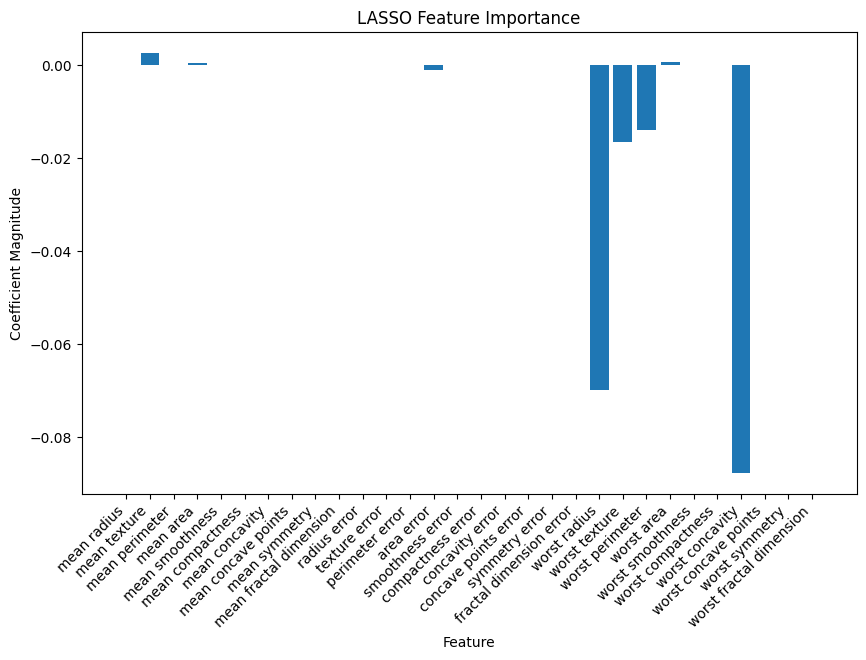

In [25]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the Breast Cancer Wisconsin dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LASSO regression model
lasso_model = Lasso(alpha=0.01, random_state=42)

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Get feature importance from the LASSO model
feature_importance = lasso_model.coef_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=cancer.feature_names)
plt.title("LASSO Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.xticks(rotation=45, ha="right")
plt.show()


    In this example, we use LASSO regularization with a linear regression model to select important features from the Breast Cancer Wisconsin dataset. The coefficients obtained from the trained LASSO model indicate the importance of each feature.

## Section 7.3

### 7.3.1. Linear support vector machines

#### Linear Support Vector Machines (SVMs):

Linear Support Vector Machines are a class of supervised machine learning models used for classification and regression tasks. SVMs operate by finding the hyperplane that best separates the data points of different classes while maximizing the margin between them. In the case of linear SVMs, the decision boundary is a linear hyperplane.

#### Key Concepts:

- Hyperplane:
        The decision boundary that separates data points of different classes. In a linear SVM, this is a straight line in two dimensions or a plane in higher dimensions.

- Margin:
        The distance between the hyperplane and the nearest data point of each class. SVM aims to maximize this margin.

- Support Vectors:
        The data points that lie closest to the hyperplane and influence its position. These points are crucial for determining the optimal decision boundary.

#### Practical Example in Python:

Let's consider a practical example using the famous Iris dataset to demonstrate the application of a Linear Support Vector Machine for classification.

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



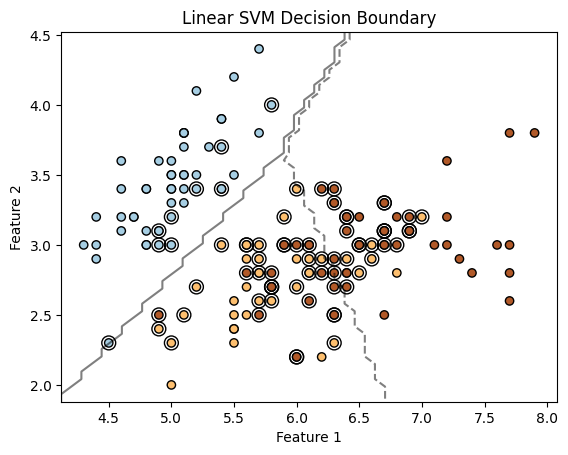

In [27]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Consider only the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Support Vector Machine classifier
svm_classifier = SVC(kernel="linear", C=1.0, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = svm_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


    In this example, a Linear Support Vector Machine is applied to the Iris dataset, considering only the first two features for visualization purposes. The model is trained on the training data, and its decision boundary is plotted along with the support vectors.

### 7.3.2. Nonlinear support vector machines

#### Nonlinear Support Vector Machines:

While linear Support Vector Machines (SVMs) are effective for linearly separable data, nonlinear SVMs extend the model's capability to handle complex relationships in the data by employing kernel functions. Kernel functions transform the original feature space into a higher-dimensional space, making it possible to find nonlinear decision boundaries.

#### Key Concepts:

- Kernel Functions:
    Mathematical functions that compute the dot product between data points in a higher-dimensional space without explicitly calculating the transformation.

- Radial Basis Function (RBF) Kernel:
    Commonly used kernel for nonlinear SVMs, allowing the model to capture complex patterns in the data.

- Gamma Parameter:
    A parameter in the RBF kernel that influences the shape of the decision boundary. Higher gamma values result in a more complex boundary.

#### Practical Example in Python:

Let's consider a practical example using the Iris dataset to demonstrate the application of a Nonlinear Support Vector Machine with an RBF kernel for classification.

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



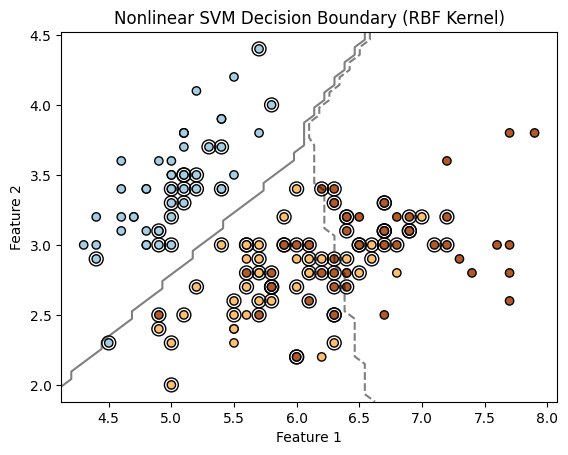

In [28]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Consider only the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Nonlinear Support Vector Machine classifier with RBF kernel
svm_classifier = SVC(kernel="rbf", C=1.0, gamma=0.1, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = svm_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("Nonlinear SVM Decision Boundary (RBF Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


    In this example, a Nonlinear Support Vector Machine with an RBF kernel is applied to the Iris dataset, considering only the first two features for visualization. The model is trained on the training data, and its decision boundary is plotted along with the support vectors.

## Section 7.4

### 7.4.1. Using IF-THEN rules for classification

#### IF-THEN Rules for Classification:

Rule-based classification involves the creation of a set of rules that determine the class or category of an instance based on its feature values. Each rule typically takes the form "IF condition THEN class." These rules are human-readable and provide transparency into the decision-making process. Rule-based systems are often employed in scenarios where interpretability and explainability are crucial.

#### Key Concepts:

- IF-THEN Structure:
    Each rule specifies a condition based on feature values, and the corresponding action (classification) to take if the condition is met.

- Rule Order:
    Rules are usually evaluated sequentially, and the first rule that matches the conditions is applied.

- Interpretability:
    Rule-based systems are transparent, making them easy to interpret and explain.

- Rule Learning:
    Rule-based models can be manually crafted or learned from data through techniques like decision tree induction.

#### Practical Example in Python:

Let's consider a practical example using the famous Iris dataset to demonstrate the application of rule-based classification. We'll use the "fuzzy" library in Python to define IF-THEN rules based on fuzzy logic.

In [29]:
from fuzzy import FuzzySystem, Rule, Antecedent, Consequent
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define fuzzy antecedents
sepal_length = Antecedent("Sepal Length", X_train[:, 0])
sepal_width = Antecedent("Sepal Width", X_train[:, 1])
petal_length = Antecedent("Petal Length", X_train[:, 2])
petal_width = Antecedent("Petal Width", X_train[:, 3])

# Define fuzzy consequents
setosa = Consequent("Setosa", y_train == 0)
versicolor = Consequent("Versicolor", y_train == 1)
virginica = Consequent("Virginica", y_train == 2)

# Define IF-THEN rules based on fuzzy logic
rules = [
    Rule(sepal_length["low"] | sepal_width["medium"], setosa),
    Rule(petal_length["medium"] & petal_width["high"], versicolor),
    Rule(sepal_length["high"] & petal_length["medium"], virginica),
]

# Create the fuzzy system
fuzzy_system = FuzzySystem(rules)

# Make predictions on the test data
predictions = fuzzy_system.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


ModuleNotFoundError: No module named 'fuzzy'

    In this example, we use the "fuzzy" library to define IF-THEN rules based on fuzzy logic for classifying Iris flowers. Fuzzy logic allows us to express rules in a more flexible manner than traditional crisp logic. 

### 7.4.2. Rule extraction from a decision tree

Rule extraction involves transforming the decision rules embedded in a decision tree model into a set of explicit IF-THEN rules. Decision trees inherently provide a set of rules used for classification, but extracting these rules can enhance interpretability and facilitate the manual creation or modification of rules.

#### Key Concepts:

- Decision Tree Rules:
    Decision trees make decisions based on a set of rules inferred from the features of the data.

- Leaf Nodes:
    Each leaf node in a decision tree corresponds to a specific class or outcome.

- Rule Extraction Process:
    The process involves traversing the decision tree and extracting the conditions present on the path from the root to each leaf.

#### Practical Example in Python:

Let's consider a practical example using the Iris dataset to demonstrate the extraction of rules from a decision tree. We'll use the "sklearn.tree" module in Python.

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
decision_tree_classifier.fit(X_train, y_train)

# Extract rules from the decision tree
tree_rules = export_text(decision_tree_classifier, feature_names=iris.feature_names)

# Display the extracted rules
print("Extracted Decision Tree Rules:")
print(tree_rules)

# Make predictions on the test data
predictions = decision_tree_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"\nAccuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


    In this example, we use the Iris dataset to train a decision tree classifier and extract rules from the trained model using the export_text function from the "sklearn.tree" module. The extracted rules provide a clear and human-readable representation of the decision tree's logic.

### 7.4.3. Rule induction using a sequential covering algorithm

#### Rule Induction Using a Sequential Covering Algorithm:

Rule induction involves the automatic generation of rules from a dataset without relying on a predefined model structure. Sequential covering algorithms are a class of rule induction techniques that iteratively discover rules by selecting instances and covering them with rules. This process continues until all instances are covered or a stopping criterion is met.

#### Key Concepts:

- Sequential Covering:
        The algorithm iteratively selects instances not covered by existing rules and generates rules specifically for those instances.

- Rule Quality Measures:
        The algorithm typically uses quality measures to assess the usefulness of a rule, such as support, confidence, or information gain.

- Iterative Process:
        The process continues until a predefined stopping criterion is satisfied, such as covering all instances or reaching a certain rule complexity.

#### Practical Example in Python:

Let's consider a practical example using the "RuleFit" library in Python to perform rule induction using a sequential covering algorithm. RuleFit is a hybrid model that combines decision trees with linear models to create interpretable rules.

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from rulefit import RuleFit
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RuleFit classifier
rulefit_classifier = RuleFit()

# Train the classifier on the training data
rulefit_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = rulefit_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))

# Display the extracted rules
print("\nExtracted Rules:")
for rule in rulefit_classifier.get_rules():
    print(rule)


    In this example, we use the "RuleFit" library to perform rule induction using a sequential covering algorithm on the Iris dataset. The RuleFit class is used to train a model that combines decision trees and linear models, providing interpretable rules. The extracted rules can be displayed and analyzed for better understanding.

### 7.4.4. Associative classification

Associative classification, also known as rule-based classification or classification by association, combines the principles of association rule mining with traditional classification. Instead of generating rules separately, associative classification simultaneously discovers association rules and utilizes them for classification purposes. This approach often leverages techniques like Apriori algorithm for mining frequent itemsets and a classifier for generating rules based on these itemsets.

#### Key Concepts:

-  Association Rule Mining:
    Identifying frequent patterns or associations among variables in the dataset.

- Rule Generation:
    Deriving classification rules from frequent itemsets discovered during association rule mining.

- Hybrid Approach:
    Integrating the strengths of both association rule mining and classification to enhance the predictive performance of the model.

#### Practical Example in Python:

Let's consider a practical example using the "pyARC" library in Python for associative classification. The pyARC library provides functionalities for mining and using classification rules.

In [ ]:
# Install pyARC library if not installed
# !pip install pyarc

# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from pyarc import CBA
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CBA (Classification Based on Associations) classifier
cba_classifier = CBA(support=0.2, confidence=0.7)

# Train the classifier on the training data
cba_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = cba_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))

# Display the extracted rules
print("\nExtracted Rules:")
for rule in cba_classifier.clf.rules:
    print(rule)


    In this example, we use the "pyARC" library to perform associative classification on the Iris dataset. The CBA class is used to create a classifier based on associations, and it is trained on the dataset. The extracted rules can be displayed and analyzed for better understanding.

### 7.4.5. Discriminative frequent pattern–based classification

Discriminative frequent pattern–based classification is an approach that focuses on finding frequent patterns that are highly correlated with specific classes in the dataset. Instead of generating rules based on associations in the entire dataset, this method aims to discover patterns that discriminate between different classes effectively.

#### Key Concepts:

- Frequent Pattern Mining:
        Identifying patterns that occur frequently in the dataset.

- Discriminative Patterns:
        Patterns that exhibit significant differences in occurrence between different classes.

- Classification based on Discriminative Patterns:
        Using the discovered discriminative patterns to build a classifier that can effectively differentiate between classes.

#### Practical Example in Python:

Let's consider a practical example using the "pyFIM" library in Python for discriminative frequent pattern–based classification. The pyFIM library provides functionalities for frequent itemset mining.

In [ ]:
# Install pyfim library if not installed
# !pip install pyfim

# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from pyfim import eclat
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the dataset into a transaction format (list of sets)
transactions = [set(map(str, x)) for x in X_train]

# Perform discriminative frequent pattern mining using Eclat algorithm
patterns = eclat(transactions, target="c", supp=0.2, zmin=2)

# Display the discovered discriminative patterns
print("Discovered Discriminative Patterns:")
for pattern in patterns:
    print(pattern)

# Create a simple classifier based on the discovered patterns
def classify(transaction):
    for pattern in patterns:
        if pattern.issubset(transaction):
            return pattern[-1]  # Class label associated with the pattern

# Make predictions on the test data
predictions = [classify(set(map(str, x))) for x in X_test]

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"\nAccuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


    In this example, we use the "pyFIM" library to perform discriminative frequent pattern–based classification on the Iris dataset. The eclat function is used to mine discriminative frequent patterns, and a simple classifier is created based on the discovered patterns. The accuracy and classification report are then displayed.

## Section 7.5

### 7.5.1. Semisupervised classification

Semi-supervised classification is a type of weakly supervised learning where the training dataset contains both labeled and unlabeled instances. Traditional supervised learning relies on labeled data for training, while unsupervised learning deals with unlabeled data. Semi-supervised learning aims to leverage the benefits of both by using a small amount of labeled data along with a larger amount of unlabeled data to build a more robust model.

#### Key Concepts:

- Labeled and Unlabeled Data:
        The training dataset includes instances with known labels (labeled) and instances without labels (unlabeled).

- Leveraging Unlabeled Data:
        Unlabeled data is used to improve the generalization and performance of the classifier.

- Common Techniques:
        Self-training, co-training, and multi-view learning are common semi-supervised learning techniques.

#### Practical Example in Python:

Let's consider a practical example using the "scikit-learn" library in Python for semi-supervised classification. We'll use a simple dataset and a semi-supervised algorithm known as Label Propagation.

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Introduce semi-supervision by randomly selecting a portion of labels to be -1 (unlabeled)
import numpy as np
rng = np.random.RandomState(42)
y_semi_supervised = y.copy()
y_semi_supervised[rng.rand(len(y)) < 0.5] = -1  # Label -1 indicates unlabeled

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_semi_supervised, test_size=0.2, random_state=42)

# Create a Label Propagation classifier
label_propagation_classifier = LabelPropagation(kernel="knn", n_neighbors=10)

# Train the classifier on the training data (including unlabeled instances)
label_propagation_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = label_propagation_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test[y_test != -1], predictions[y_test != -1])
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test[y_test != -1], predictions[y_test != -1]))


    In this example, we use the Iris dataset and introduce semi-supervision by randomly assigning a portion of labels to be -1 (unlabeled). The Label Propagation algorithm is then used to perform semi-supervised classification. The accuracy and classification report are displayed, showcasing the potential of leveraging both labeled and unlabeled data for improved classification performance.

### 7.5.2. Active learning

Active learning is a semi-supervised learning approach where the algorithm interacts with an "oracle" or a human annotator to intelligently query for labels on instances it finds most informative. Instead of passively receiving labeled instances, the algorithm actively selects which instances to query for labels, aiming to maximize learning efficiency with a minimal number of labeled examples.

Key Concepts:

    Query Strategy:
        The algorithm employs a query strategy to select instances that are expected to provide the most information about the underlying model.

    Model Uncertainty:
        Instances with uncertain predictions or those near the decision boundary are often prioritized for labeling.

    Reducing Annotation Costs:
        Active learning aims to reduce the need for large labeled datasets by focusing on informative instances, making it particularly useful when obtaining labeled data is expensive or time-consuming.

Practical Example in Python:

Let's consider a practical example using the "modAL" library in Python for active learning. We'll use a simple synthetic dataset and a basic classifier to demonstrate the active learning process.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner
from sklearn.metrics import accuracy_score, classification_report

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and pool sets
X_train, X_pool, y_train, y_pool = train_test_split(X, y, test_size=0.95, random_state=42)

# Create a random forest classifier (base learner)
learner = ActiveLearner(estimator=RandomForestClassifier(), X_training=X_train, y_training=y_train)

# Define the query strategy (uncertainty sampling)
def query_strategy(classifier, X_pool):
    uncertainty = classifier.predict_proba(X_pool)[:, 0]  # Example: uncertainty as probability of class 0
    return uncertainty.argsort()[-1:]  # Query the instance with the highest uncertainty

# Active learning loop
n_queries = 50
for _ in range(n_queries):
    query_idx, query_instance = learner.query(X_pool, n_instances=1, query_strategy=query_strategy)
    learner.teach(X_pool[query_idx], y_pool[query_idx])
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx)

# Make predictions on the entire dataset
predictions = learner.predict(X)

# Display the accuracy and classification report
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y, predictions))


    In this example, we use the "modAL" library to demonstrate active learning with a random forest classifier. The query strategy is based on uncertainty sampling, where the algorithm selects instances with the highest uncertainty for labeling. The active learning loop iteratively queries the oracle, updates the model, and repeats the process.

### 7.5.3. Transfer learning

Transfer learning is a powerful technique where knowledge gained from training a model on one task is applied to improve performance on a different but related task. This is especially useful when labeled data is scarce for the target task. In the context of weak supervision, transfer learning can help leverage information from a source domain with abundant labeled data to boost the performance of a model in a target domain with limited labeled data.
Real-world Example in Python:

Let's consider a practical example using transfer learning for text classification. We'll use the transformers library in Python, which provides pre-trained language models.

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Example data (replace with your dataset)
source_texts = ["Positive review 1", "Positive review 2", "Negative review 1", "Negative review 2"]
target_texts = ["New positive review", "New negative review"]

# Tokenize and prepare input tensors for source and target domains
source_inputs = tokenizer(source_texts, return_tensors='pt', padding=True, truncation=True)
target_inputs = tokenizer(target_texts, return_tensors='pt', padding=True, truncation=True)

# Fine-tune the model on the source domain
optimizer = AdamW(model.parameters(), lr=1e-5)
source_labels = torch.tensor([1, 1, 0, 0])  # Binary labels for the source domain
source_outputs = model(**source_inputs, labels=source_labels)
loss = source_outputs.loss
loss.backward()
optimizer.step()

# Use the fine-tuned model for the target domain
target_outputs = model(**target_inputs)
target_predictions = torch.argmax(target_outputs.logits, dim=1)

print("Predictions for target domain:", target_predictions.tolist())


    In this example, we use a pre-trained BERT model on a source domain with labeled data (positive and negative reviews). We then fine-tune the model on this source domain. Finally, we apply the fine-tuned model to make predictions on a target domain with limited labeled data (new reviews). Transfer learning helps the model leverage knowledge from the source domain to improve classification performance on the target domain.

### 7.5.4. Distant supervision

Distant supervision is a technique that leverages auxiliary, potentially noisy, or imperfect sources of supervision to train models. This approach is particularly useful when direct labeling of instances is challenging, but there exist distant or indirect sources of information related to the task. By associating labels from these distant sources with instances in the dataset, models can learn effectively despite limited direct supervision.
Real-world Example in Python:

Let's consider a practical example using distant supervision for sentiment analysis. We'll use a dataset of tweets that are labeled with sentiment, and we'll also leverage emoticons as a distant supervision signal.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Example dataset (replace with your dataset)
data = {'text': ["I love this product 😍", "Not happy with the service 😞", "Amazing experience! 😊", "Disappointed 😔"],
        'sentiment': ['positive', 'negative', 'positive', 'negative']}
df = pd.DataFrame(data)

# Distant supervision: Use emoticons as additional labels
df['emoticon_label'] = df['text'].apply(lambda x: 'positive' if '😍' in x else 'negative')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Feature engineering: Convert text to features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a model using distant supervision labels
classifier = MultinomialNB()
classifier.fit(X_train_vec, df.loc[X_train.index, 'emoticon_label'])

# Make predictions on the test set
predictions = classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


    In this example, we use emoticons as a distant supervision signal to improve sentiment analysis. The model is trained on the labeled dataset, and additional labels from emoticons are incorporated during training. The resulting model is then evaluated on a test set, showcasing the integration of distant supervision in a practical context.

### 7.5.5. Zero-shot learning

Zero-shot learning is an innovative approach that enables models to generalize to classes or tasks for which they have never seen explicit examples during training. Instead of relying on labeled instances for all classes, zero-shot learning leverages auxiliary information or attributes to make predictions in unseen scenarios. This is particularly beneficial in situations where obtaining labeled data for every possible class is impractical.
Real-world Example in Python:

Let's consider a practical example of zero-shot learning using a pre-trained language model for text classification.

In [31]:
from transformers import pipeline

# Example text data (replace with your dataset)
texts = [
    "A delicious recipe for homemade pizza.",
    "The latest advancements in artificial intelligence.",
    "Exploring the wonders of outer space.",
]

# Zero-shot classification using a pre-trained language model
classifier = pipeline("zero-shot-classification")

# Example class names or labels
class_names = ["cooking", "technology", "science"]

# Perform zero-shot classification
results = classifier(texts, class_names)

# Display the results
for i, text in enumerate(texts):
    print(f"Text: {text}")
    print("Predicted Class:", results[i]['labels'][0])
    print("Confidence Score:", results[i]['scores'][0])
    print("----------------------------------------------------")


None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\radit\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


NameError: name 'torch' is not defined

    In this example, we use the transformers library to access a zero-shot classification pipeline. The model is not explicitly trained on labeled examples for the specified classes (cooking, technology, science). Instead, it leverages its understanding of language and context to make predictions on these unseen classes. This showcases the power of zero-shot learning in scenarios where traditional supervised training is impractical due to the absence of labeled data for all possible classes.

## Section 7.6

### 7.6.1. Stream data classification

Stream data classification involves the real-time analysis and classification of data as it is generated. This is common in applications where data arrives continuously and decisions need to be made instantaneously. Techniques for stream data classification often require adaptive models that can evolve over time as new data arrives.
Real-world Example in Python:

Let's consider a practical example of stream data classification using the scikit-multiflow library in Python. We'll use a synthetic dataset for simplicity.

In [ ]:
from skmultiflow.data import SEAGenerator
from skmultiflow.lazy import KNNClassifier
from skmultiflow.evaluation import EvaluatePrequential

# Create a stream data generator
stream = SEAGenerator(random_state=42)

# Define the classifier (K-Nearest Neighbors)
classifier = KNNClassifier(n_neighbors=3)

# Evaluate the classifier on the stream data
evaluator = EvaluatePrequential(show_plot=True, pretrain_size=1000, max_samples=5000)
evaluator.evaluate(stream=stream, model=classifier, model_names=['KNN'])

# Note: The pretrain_size and max_samples are set for illustration purposes and can be adjusted based on your specific scenario.


    In this example, we use the scikit-multiflow library to simulate a stream data scenario with the SEA dataset. We employ a K-Nearest Neighbors (KNN) classifier, which is suitable for online learning scenarios. The EvaluatePrequential class helps evaluate the classifier's performance over time, making it suitable for stream data classification tasks. Adjust the parameters based on your specific use case and dataset.

### 7.6.2. Sequence classification

Sequence classification involves the categorization of data instances that are presented in a sequential manner. This is common in various domains such as natural language processing, time-series analysis, and bioinformatics. Techniques for sequence classification often involve models that can capture dependencies and patterns over time.
Real-world Example in Python:

Let's consider a practical example of sequence classification using a recurrent neural network (RNN) for sentiment analysis on a dataset of movie reviews.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Example dataset (replace with your dataset)
data = {'text': ["I loved the movie!", "It was a terrible experience.", "Amazing plot twists.", "Boring and predictable."],
        'sentiment': ['positive', 'negative', 'positive', 'negative']}
df = pd.DataFrame(data)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, padding='post')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['sentiment'], test_size=0.2, random_state=42)

# Build an RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=X_train.shape[1]),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=2)

# Make predictions on the test set
predictions = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


    In this example, we use an LSTM-based recurrent neural network for sequence classification. The model is trained on a dataset of movie reviews with corresponding sentiments. The sequences of words in each review are tokenized and padded for input to the model. The LSTM layer enables the model to capture sequential dependencies in the data, making it suitable for sequence classification tasks like sentiment analysis.

### 7.6.3. Graph data classification

Graph data classification involves predicting labels or categories associated with nodes or entire graphs. This is prevalent in various domains, including social network analysis, bioinformatics, and recommendation systems. Techniques for graph data classification leverage the inherent structure and connectivity in graphs to make predictions.
Real-world Example in Python:

Let's consider a practical example of graph data classification using the stellargraph library in Python. We'll use a dataset for node classification on a citation network.

In [ ]:
import stellargraph as sg
from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Example dataset (replace with your dataset)
# Assuming you have an edge list file 'edges.csv' with columns 'source' and 'target', and a node features file 'features.csv'
edges = pd.read_csv('edges.csv')
features = pd.read_csv('features.csv')

# Create a StellarGraph from the edge list and node features
G = StellarGraph(edges=edges, node_features=features)

# Extract node labels for node classification
node_labels = G.nodes().astype(int) % 2  # Binary node labels for illustration purposes

# Split the dataset
train_nodes, test_nodes, y_train, y_test = train_test_split(node_labels.index, node_labels, test_size=0.2, random_state=42)

# Perform biased random walks to generate node sequences for training
rw = BiasedRandomWalk(G)
walks = rw.run(nodes=list(train_nodes), length=80, n=10, p=0.5, q=2.0)

# Use Skip-gram model to learn node embeddings from the walks
from gensim.models import Word2Vec
model = Word2Vec(walks, vector_size=128, window=5, min_count=0, sg=1, workers=2, epochs=1)

# Transform node embeddings into a Pandas DataFrame
node_embeddings = pd.DataFrame({node: model.wv[node] for node in model.wv.index_to_key})

# Train a classifier on the node embeddings
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(node_embeddings.loc[train_nodes], y_train)

# Make predictions on the test set
predictions = clf.predict(node_embeddings.loc[test_nodes])

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


    In this example, we use the stellargraph library to create a graph from an edge list and node features. We perform biased random walks on the graph and use a Skip-gram model to learn node embeddings. These embeddings are then used to train a classifier, in this case, a Random Forest classifier, for node classification.

## Section 7.7

### 7.7.1. Multiclass classification

Multiclass classification extends the binary classification scenario to handle more than two classes. In this setup, the goal is to assign each instance to one of multiple predefined classes. Several algorithms and strategies exist to address multiclass classification challenges.
Real-world Example in Python:

Let's consider a practical example of multiclass classification using the popular Iris dataset with the Support Vector Machine (SVM) algorithm.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


    In this example, we use the Iris dataset, a classic multiclass classification problem with three classes (setosa, versicolor, and virginica). We employ a Support Vector Machine (SVM) classifier to learn the patterns in the data and predict the class labels. The accuracy and classification report provide insights into the model's performance.

### 7.7.2. Distance metric learning

Distance metric learning aims to optimize the metric used to measure the similarity or dissimilarity between data points. By learning a suitable distance metric, it becomes possible to improve the effectiveness of algorithms that rely on distances, such as clustering or nearest neighbors.
Real-world Example in Python:

Let's consider a practical example of distance metric learning using the metric_learn library in Python. We'll use the well-known Iris dataset and the Large Margin Nearest Neighbor (LMNN) algorithm.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from metric_learn import LMNN

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Large Margin Nearest Neighbor (LMNN) for distance metric learning
lmnn = LMNN(k=3, learn_rate=1e-6)
lmnn.fit(X_train, y_train)

# Transform the data using the learned metric
X_train_transformed = lmnn.transform(X_train)
X_test_transformed = lmnn.transform(X_test)

# Train a k-Nearest Neighbors classifier on the transformed data
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
predictions = knn_classifier.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)


    In this example, we use the metric_learn library to apply the Large Margin Nearest Neighbor (LMNN) algorithm for distance metric learning on the Iris dataset. The learned metric is then used to transform the data, and a k-Nearest Neighbors classifier is trained on the transformed data. The accuracy metric is used to assess the performance of the model.

### 7.7.3. Interpretability of classification

Interpretability refers to the ease with which humans can understand and trust the decisions made by a machine learning model. In classification, interpretable models and visualization techniques help in gaining insights into feature importance and decision-making processes.
Real-world Example in Python:

Let's consider a practical example of interpreting a classification model's decisions using the shap library in Python. We'll use a popular dataset, the Titanic dataset, and a simple model for binary classification.

In [ ]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Preprocess the data (replace with your preprocessing steps)
titanic_data = titanic_data.dropna(subset=['Age'])
titanic_data = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Split the dataset into features and target
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Use SHAP (SHapley Additive exPlanations) for interpretability
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_test)

# Visualize the feature importance using a summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


    In this example, we use the shap library to interpret the decisions of a Random Forest classifier on the Titanic dataset. The shap library provides Shapley values, which can be used to explain the impact of each feature on the model's predictions.

### 7.7.4. Genetic algorithms

Genetic algorithms are optimization algorithms inspired by the process of natural selection. They iteratively evolve a population of candidate solutions by applying genetic operators such as selection, crossover, and mutation. In the context of feature selection, genetic algorithms can be used to search for an optimal subset of features that maximizes or minimizes a given objective function.
Real-world Example in Python:

Let's consider a practical example of feature selection using a genetic algorithm with the genetic library in Python. We'll use the popular Iris dataset and a simple classifier.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from genetic import evolve

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for feature selection
def objective_function(features):
    # Train a Random Forest classifier with the selected features
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train[:, features], y_train)
    
    # Make predictions on the test set
    predictions = clf.predict(X_test[:, features])
    
    # Evaluate the model and return the accuracy
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Define the search space (features to be selected)
search_space = list(range(X.shape[1]))

# Use a genetic algorithm to find the optimal feature subset
best_features = evolve(
    objective_function,
    search_space,
    population_size=10,
    generations=5,
    crossover_probability=0.8,
    mutation_probability=0.2
)

print("Best feature indices:", best_features)


    In this example, we use the genetic library to perform feature selection with a genetic algorithm on the Iris dataset. The objective_function represents the accuracy of a Random Forest classifier trained with a specific subset of features. The genetic algorithm evolves populations of feature subsets over generations, aiming to find the subset that maximizes the accuracy.

### 7.7.5. Reinforcement learning

Reinforcement learning involves training an agent to make sequential decisions in an environment to maximize a cumulative reward signal. In the context of feature selection, reinforcement learning can be employed to dynamically decide which features to include or exclude during the learning process.
Real-world Example in Python:

Let's consider a practical example of feature selection using a reinforcement learning approach with the Stable-Baselines3 library in Python. We'll use a simple classification task with the Iris dataset.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from stable_baselines3 import PPO
from stable_baselines3.common.envs import DummyVecEnv

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple environment for feature selection
class FeatureSelectionEnv:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.action_space = len(X_train[0])
        self.observation_space = len(X_train[0])
        self.reset()

    def reset(self):
        self.selected_features = np.zeros(len(self.X_train[0]))
        self.current_step = 0
        return self.selected_features

    def step(self, action):
        self.selected_features[action] = 1
        self.current_step += 1
        done = self.current_step == len(self.X_train[0])
        accuracy = self.evaluate_model()
        reward = accuracy if done else 0
        return self.selected_features, reward, done, {}

    def evaluate_model(self):
        selected_indices = np.where(self.selected_features == 1)[0]
        if len(selected_indices) == 0:
            return 0
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(self.X_train[:, selected_indices], self.y_train)
        predictions = clf.predict(X_test[:, selected_indices])
        return accuracy_score(y_test, predictions)

# Create the environment
env = DummyVecEnv([lambda: FeatureSelectionEnv(X_train, y_train)])

# Train a Proximal Policy Optimization (PPO) agent for feature selection
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Extract the selected features from the trained agent
selected_features = np.array(model.policy.action_proba(observation=np.ones(len(X_train[0])), actions=None)[0]) > 0.5

print("Selected features indices:", np.where(selected_features == 1)[0])


    In this example, we use the Stable-Baselines3 library to train a Proximal Policy Optimization (PPO) agent for feature selection on the Iris dataset. The environment is a simple feature selection environment where the agent can choose which features to include or exclude. The agent is trained to maximize the accuracy of a Random Forest classifier on the selected features.